## Hostname-Analyzer

### 1. Importar todas las librerías necesarias.

In [1]:
import random 

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Me servirá para normalizar el degradado de colores en el gráfico 3

import seaborn as sns  # Me servirá para la gama de colores del gráfico 3

import numpy as np  # Será útil para el gráfico 2 de tarta, ya que utilizaré una funciones trigonométricas 


### 2. Inicializar algunas variables que después modificaremos. 


In [2]:
hostnames = []
dataset = []
df = None

### 3. Crear una función para generar los hostnames en base a unas reglas.


In [3]:
def set_hostnames(number_of_hosts: int) -> None:
    sistema_operativo = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1 # 40% Linux / 30% Solaris / 20% AIX / 10% HP-UX
    entorno = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30  # 10% Development / 10% Integration / 25% Testing / 25% Staging / 30% Production
    paises = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30  # Noruega 6% / Francia 9% / Italia 16% / España 16% / Alemania 23% / Irlanda 30%
    grupo_alpha = []

    for i in range(number_of_hosts):
        pais = random.choice(paises)
        hostname = random.choice(sistema_operativo) + random.choice(entorno)
        hostname += pais
        grupo_alpha.append(hostname)
        numero_grupo = min(grupo_alpha.count(hostname), 999)  # Quiero liminar que el valor máximo sea 999, de esta forma el mínimo será el valor de hostname, o 999, cual sea menor de ambos
        hostname += str(grupo_alpha.count(hostname)).zfill(3) # Añade ceros a la izquierda hasta tener dos dígitos
        hostnames.append(hostname)
    

### 4. Crear una función para obtener el nombre del SO.

In [4]:
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknown'
    

### 5. Crear una función para obtener el nombre del entorno. 

In [5]:
def get_environment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknown'


### 6. Creamos una función para obtener el nombre del país.

In [6]:
# Intento definir esta función de forma distinta, por variar y porque se visualiza mejor. 

def get_country(hostname: str) -> str:
    country_codes = {
        'NOR': 'Norway',
        'ITA': 'Italy',
        'ESP': 'Spain',
        'IRL': 'Ireland',
        'FRA': 'France',
        'DEU': 'Germany'
    }
    country_code = hostname[2:5]
    return country_codes.get(country_code, 'Unknown')

### 7. Crear una función para generar el DataFrame.

In [7]:
def set_dataframe(count: int) -> None:
    global df
    
    set_hostnames(count)
    
    for hostname in hostnames:
        dataset.append({
            'hostname': hostname, 
            'os': get_os(hostname),
            'environment': get_environment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:])
        })
        
    df = pd.DataFrame(dataset)
    
    

### 8. Crear el DataFrame.

In [8]:
set_dataframe(1500)

In [9]:
df

,hostname,os,environment,country,node
0,SIITA001,Solaris,Integration,Italy,1
1,SSESP001,Solaris,Staging,Spain,1
2,APITA001,AIX,Production,Italy,1
3,HSITA001,HP-UX,Staging,Italy,1
4,SSFRA001,Solaris,Staging,France,1
...,...,...,...,...,...
1495,ATITA013,AIX,Testing,Italy,13
1496,LPITA040,Linux,Production,Italy,40
1497,SDIRL015,Solaris,Development,Ireland,15
1498,LTFRA011,Linux,Testing,France,11


### 9. Guardar el DataFrame generado en un fichero CSV. 

In [10]:
df.to_csv('hosts.csv', index=False, header=True)

hosts_df = pd.read_csv('hosts.csv')

hosts_df

,hostname,os,environment,country,node
0,SIITA001,Solaris,Integration,Italy,1
1,SSESP001,Solaris,Staging,Spain,1
2,APITA001,AIX,Production,Italy,1
3,HSITA001,HP-UX,Staging,Italy,1
4,SSFRA001,Solaris,Staging,France,1
...,...,...,...,...,...
1495,ATITA013,AIX,Testing,Italy,13
1496,LPITA040,Linux,Production,Italy,40
1497,SDIRL015,Solaris,Development,Ireland,15
1498,LTFRA011,Linux,Testing,France,11


### 10.Generar un único gráfico, agrupando para cada país (country) los entornos (enviroment). 

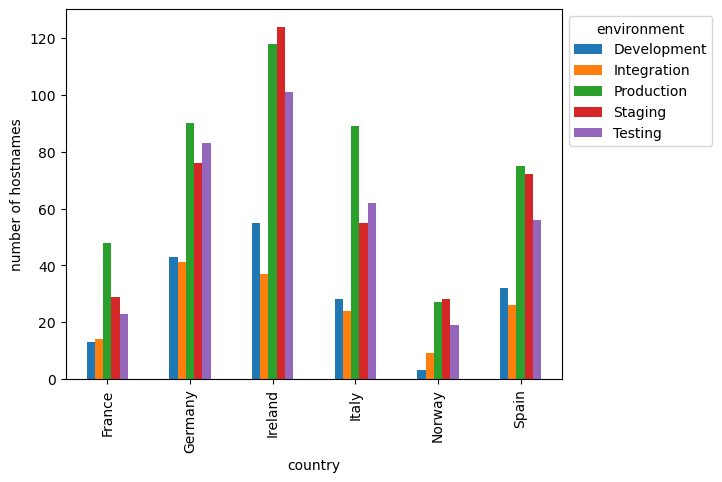

Total number of cases: 1500
Se puede observar como Irlanda es el país que más hostnames tiene al representar un 30%, seguida de Alemania. Último país es Noruega. Por environment vemos que Production (línea verde) el mayoritario, como era de esperar. En Alemania casi Testing supera a Production, pues hay que tener en cuenta que hemos cuantificado 1.500 casos, si hubiéramos cuantificado 50 millones, los hostnames serían casi idénticos a las probabilidades asignadas anteriormente por el Teorema Central del Límite.


In [95]:
agrupado = df.groupby(['country', 'environment']).size()

unstacked = agrupado.unstack()

ax = unstacked.plot(kind='bar', stacked=False)
ax.set_ylabel('number of hostnames')   # Le doy nombre al eje "x" aunque no sea necesario. 

ax.legend(title='environment', bbox_to_anchor=(1, 1), loc='upper left') # Permitame el atrevimiento de cambiar la leyenda 
                                                                        # fuera del gráfico, creo que mejora la interpretación

plt.show()

numero_de_casos = unstacked.sum().sum()
print(f"Total number of cases: {numero_de_casos}")  # Compruebo que son 1.500 los casos totales, no vaya a ser que haya algo raro



### Interpretación del gráfico

texto = '''\nSe puede observar como Irlanda es el país que más hostnames tiene al representar un 30%, seguida de Alemania. Último país es Noruega. 
Por environment vemos que Production (línea verde) el mayoritario, como era de esperar. En Alemania casi Testing supera a Production, 
pues hay que tener en cuenta que hemos cuantificado 1.500 casos, si hubiéramos cuantificado 50 millones, los hostnames serían casi idénticos a las probabilidades asignadas anteriormente por el Teorema Central del Límite.'''

texto_sin_saltos = texto.replace('\n', '')

print(texto_sin_saltos)


### 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.

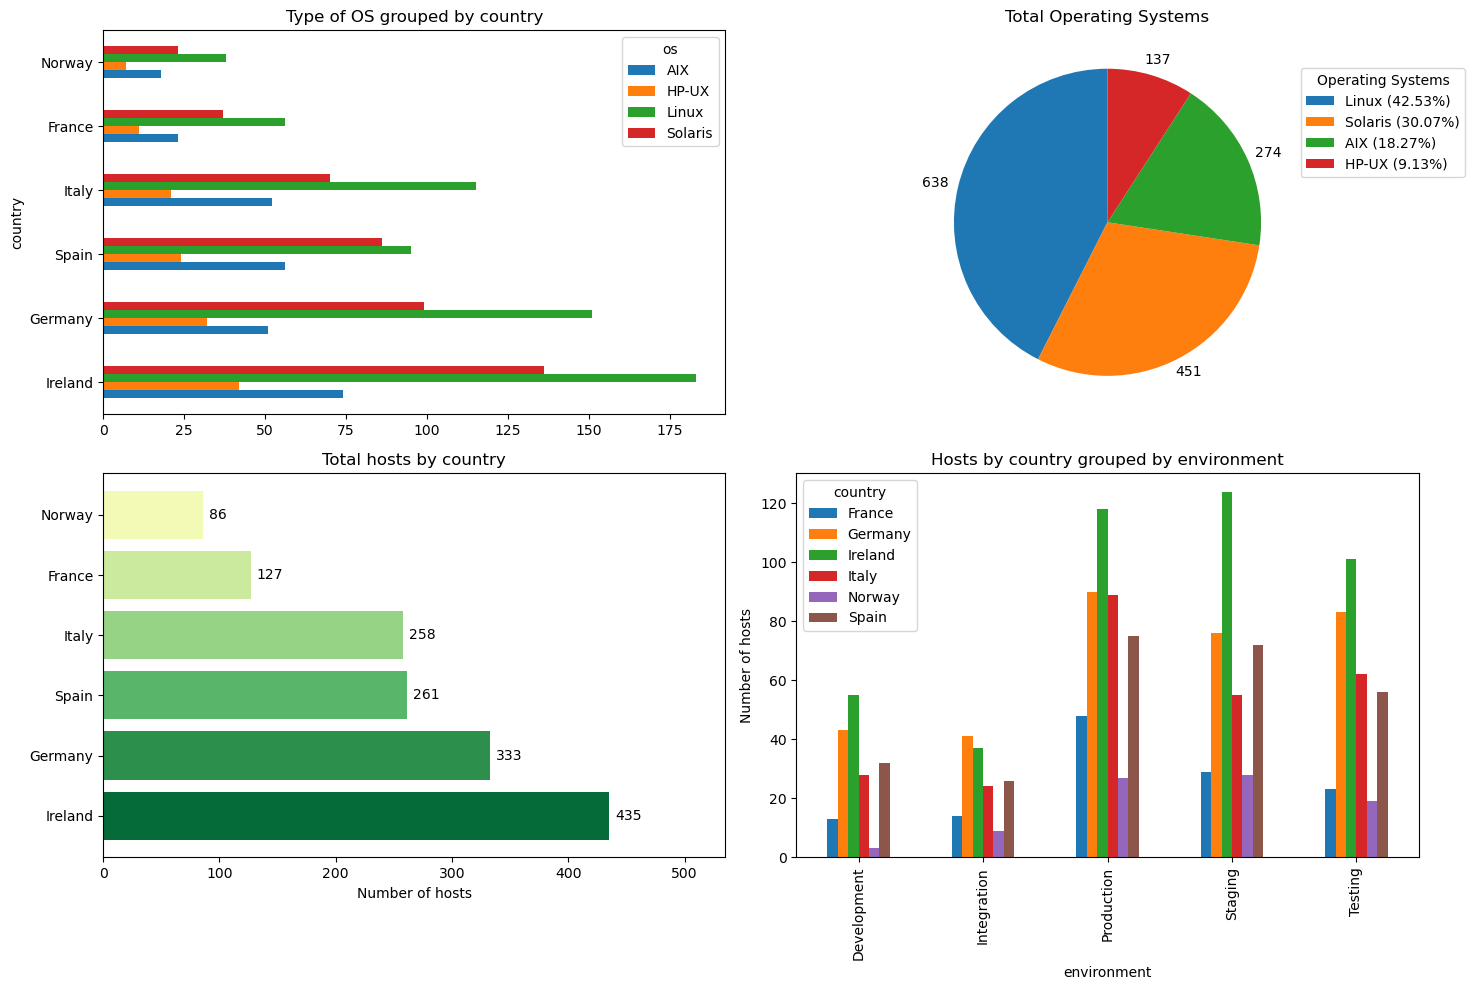

In [96]:
# Creo los gráficos con los 4 ejes. 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
                                                           


### Gráfico 1: Type of OS grouped by country 


# Aunque no sea necesario, añado fill_value 0 para evitar cualquier NaN 
os_by_country = df.groupby(['country', 'os']).size().unstack(fill_value=0) 

# Ordeno los países por número de hostnames para una mejor comparacion 
os_by_country = os_by_country.loc[os_by_country.sum(axis=1).sort_values(ascending=False).index]  

# Escogo el tipo de gráfico y le doy título
os_by_country.plot(kind='barh', stacked=False, ax=ax1)
ax1.set_title('Type of OS grouped by country')



### Gráfico 2: Total Operating Systems


# Cálculo los conteos y porcentajes de sistemas operativos
os_counts = df['os'].value_counts()
porcentaje = 100 * os_counts / os_counts.sum()  

# Creo una lista de etiquetas para que muestre el porcentaje tal como en el documento de la práctica
legend_labels = [f"{os} ({porcentaje:.2f}%)" for os, porcentaje in zip(os_counts.index, porcentaje)]

# Genero el gráfico de tarta, con los totales como autotexto, angulo 90 para mejorar la visualizacion, y 
# autopct buscando que aparezcan los totales hostnames en el pie, 42.53*1500/100 me daria 638 para Linux
wedges, texts, autotexts = ax2.pie(os_counts, startangle=90,
                                   autopct=lambda pct: "{:.0f}".format(pct * sum(os_counts) / 100))

# Ajusto la posición del total de sistema operativos fuera de la tarta. #La variable "angle" utiliza trigonometría 
# para colocar el número encima de la tarta, entiendo la complejidad que conlleva pero no he encontrado algo más sencillo 
for i, autotext in enumerate(autotexts):
    angle = (wedges[i].theta2 - wedges[i].theta1) / 2 + wedges[i].theta1
    x = wedges[i].r * 1.15 * np.cos(angle * np.pi / 180)       # Cálculo coordenada "x" fuera del círculo
    y = wedges[i].r * 1.1 * np.sin(angle * np.pi / 180)        # Cálculo coordenada "y" fuera del círculo
    autotext.set_position((x, y))                              # Coloco el texto en las coordenadas calculadas
    #autotext.set_horizontalalignment('center')  # Alineo horizontalmente
    #autotext.set_verticalalignment('center')    # Alineo verticalmente

# Configuro el título 
ax2.set_title('Total Operating Systems')

# Ajusto la leyenda para incluir solo los porcentajes, cambio los números del paréntesis para que aparezca de arriba a la derecha 
ax2.legend(wedges, legend_labels, title="Operating Systems", loc="upper right", bbox_to_anchor=(0.95, 0, 0.5, 0.92))




#### Gráfico 3: Total hosts by country

# Ordeno de mayor a menor simplemente por gusto. 
hosts_by_country = df['country'].value_counts().sort_values(ascending=False) 

# Utilizo la libería seaborn para  una paleta de colores de amarillo a verde (como el documento aunque podría haber seleccionado otra)
palette = sns.color_palette("YlGn_r") 

# Normalizo los valores de 'hosts_by_country' para un rango de valores de 0 a 1
# Utilizo (1 - norm) para invertir el degradado de colores, colores más altos que sean los oscuros
norm = mcolors.Normalize(vmin=hosts_by_country.min(), vmax=hosts_by_country.max())
color_values = 1 - norm(hosts_by_country.values)

# Dibujo las barras con la paleta de colores seleccionada anteriormente. 
bars = ax3.barh(hosts_by_country.index, hosts_by_country, color=palette)

# Añado el total de hosts al lado derecho de cada barra.
for bar in bars:
    width = bar.get_width()  # Obtengo el ancho de la barra (el total de hosts).
    label_x_pos = width + 5  # Ajusto esta posición si es necesario para mover la etiqueta a la derecha, 5 me gusta como aparece. 
    ax3.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width}', ha='left', va='center')

# Establezco título y etiquetas.
ax3.set_title('Total hosts by country')
ax3.set_xlabel('Number of hosts')

# Ajustar el límite del eje "x" agregando 100 unidades al máximo valor de la columna.
max_value_x = hosts_by_country.max() + 100
ax3.set_xlim([0, max_value_x])



### Gráfico 4: Hosts by country grouped by environment

hosts_by_env_country = df.groupby(['environment', 'country']).size().unstack(fill_value=0)
hosts_by_env_country.plot(kind='bar', ax=ax4)
ax4.set_ylabel('Number of hosts')
ax4.set_title('Hosts by country grouped by environment')



# Ajustar los márgenes y espacios entre los gráficos
plt.tight_layout()

# Mostrar la figura completa
plt.show()